In [1]:
# 데이터 분석을 위한 패키지
import numpy as np
import pandas as pd

In [2]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import koreanize_matplotlib

In [4]:
# 모든 컬럼,행을 출력하도록 설정
pd.set_option('display.max_columns', None) # None으로 설정하면 모든 컬럼 출력
pd.set_option('display.max_rows', 50) #None으로 설정하면 모든 행 출력

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

In [6]:
# 날짜는 파이썬 표준 라이브러리 datetime 사용
import datetime
# 오늘 날짜 가져오기
today = datetime.datetime.today()
today = today.strftime('%Y-%m-%d')
today

'2024-12-23'

In [7]:
file_name = f'etf_{today}.csv'
file_name

'etf_2024-12-23.csv'

In [8]:
df_etfs = pd.read_csv(file_name)

In [9]:
df_etfs.shape

(930, 12)

In [10]:
df_etfs.head()

,Symbol,Category,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
0,459580,6,KODEX CD금리액티브(합성),1057825,2,175,0.02,"1,057,729.00",0.84,58904,62309,94621
1,357870,6,TIGER CD금리투자KIS(합성),55435,3,0,0.00,"55,439.00",0.85,34705,1923,67034
2,360750,4,TIGER 미국S&P500,21435,2,280,1.32,"21,377.00",12.14,761654,16329,65495
3,069500,1,KODEX 200,32045,2,180,0.56,"32,091.00",-7.36,994559,31958,54925
4,133690,4,TIGER 미국나스닥100,137515,2,1785,1.32,"137,154.00",15.83,89061,12260,43936


In [11]:
df_etfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Symbol       930 non-null    object 
 1   Category     930 non-null    int64  
 2   Name         930 non-null    object 
 3   Price        930 non-null    int64  
 4   RiseFall     930 non-null    int64  
 5   Change       930 non-null    int64  
 6   ChangeRate   930 non-null    float64
 7   NAV          930 non-null    float64
 8   EarningRate  870 non-null    float64
 9   Volume       930 non-null    int64  
 10  Amount       930 non-null    int64  
 11  MarCap       930 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 87.3+ KB


In [12]:
# 거래량 상위 10개
df_etfs.sort_values('Volume', ascending=False).head(10)

# 등락율 기준 상위 10개

# 거래량 상위 10개
df_etfs.sort_values('ChangeRate', ascending=False).head(10)

,Symbol,Category,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
387,498270,4,KOSEF 미국양자컴퓨팅,10030,2,645,6.87,"9,866.00",NaN,303102,3026,381
840,256450,4,PLUS 심천차이넥스트(합성),10320,2,580,5.95,"9,793.00",51.36,1,0,52
637,419650,4,PLUS 글로벌수소&차세대연료전지,3770,2,210,5.90,"3,772.00",-1.93,1392,5,109
877,438210,4,PLUS 글로벌AI,16035,2,740,4.84,"15,955.00",31.91,943,15,40
904,098560,2,TIGER 방송통신,7550,2,340,4.72,"7,566.00",7.10,5347,40,29
614,417450,4,RISE 글로벌수소경제,7255,2,300,4.31,"7,287.00",4.82,1472,10,120
789,491820,2,HANARO 전력설비투자,11500,2,450,4.07,"11,523.00",NaN,491,5,63
506,463250,2,TIGER 우주방산,11145,2,430,4.01,"11,150.00",-1.24,45614,510,201
837,437550,7,히어로즈 글로벌리츠이지스액티브,10710,2,410,3.98,"10,650.00",-6.24,586,6,54
114,456600,4,TIMEFOLIO 글로벌AI인공지능액티브,26210,2,985,3.90,"26,140.00",28.24,67256,1760,2857


In [13]:
# 파생열 추가 CategoryName
# df_etfs['CategoryName'] = df_etfs['Category']

In [14]:
# 파생열 추가 CategoryName
df_etfs['CategoryName'] = df_etfs['Category']

# Category코드를 코드명으로 변경
# 1. 국내 시장지수 2. 국내 업종/테마 3. 국내파생 4. 해외주식 5. 원자재 6. 채권 7. 기타
category_decode = ['국내 시장지수','국내 업종/테마' ,'국내파생' ,'해외주식','원자재','채권','기타']
df_etfs['CategoryName'] = df_etfs['CategoryName'].replace([i+1 for i in range(7)],category_decode)

In [15]:
df_etfs.head(5)

,Symbol,Category,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,CategoryName
0,459580,6,KODEX CD금리액티브(합성),1057825,2,175,0.02,"1,057,729.00",0.84,58904,62309,94621,채권
1,357870,6,TIGER CD금리투자KIS(합성),55435,3,0,0.00,"55,439.00",0.85,34705,1923,67034,채권
2,360750,4,TIGER 미국S&P500,21435,2,280,1.32,"21,377.00",12.14,761654,16329,65495,해외주식
3,069500,1,KODEX 200,32045,2,180,0.56,"32,091.00",-7.36,994559,31958,54925,국내 시장지수
4,133690,4,TIGER 미국나스닥100,137515,2,1785,1.32,"137,154.00",15.83,89061,12260,43936,해외주식


In [16]:
df_etfs.columns.tolist()

['Symbol',
 'Category',
 'Name',
 'Price',
 'RiseFall',
 'Change',
 'ChangeRate',
 'NAV',
 'EarningRate',
 'Volume',
 'Amount',
 'MarCap',
 'CategoryName']

In [17]:
columns = ['Symbol',
 'Category',
 'CategoryName',
 'Name',
 'Price',
 'RiseFall',
 'Change',
 'ChangeRate',
 'NAV',
 'EarningRate',
 'Volume',
 'Amount',
 'MarCap'
 ]

In [18]:
df_etfs

,Symbol,Category,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,CategoryName
0,459580,6,KODEX CD금리액티브(합성),1057825,2,175,0.02,"1,057,729.00",0.84,58904,62309,94621,채권
1,357870,6,TIGER CD금리투자KIS(합성),55435,3,0,0.00,"55,439.00",0.85,34705,1923,67034,채권
2,360750,4,TIGER 미국S&P500,21435,2,280,1.32,"21,377.00",12.14,761654,16329,65495,해외주식
3,069500,1,KODEX 200,32045,2,180,0.56,"32,091.00",-7.36,994559,31958,54925,국내 시장지수
4,133690,4,TIGER 미국나스닥100,137515,2,1785,1.32,"137,154.00",15.83,89061,12260,43936,해외주식
...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,227550,2,TIGER 200 산업재,6335,3,0,0.00,"6,323.00",-7.04,0,0,15,국내 업종/테마
926,306530,3,HANARO 코스닥150선물레버리지,6310,2,25,0.40,"6,329.00",-26.66,1493,9,15,국내파생
927,412560,2,TIGER BBIG레버리지,1869,5,-77,-3.96,"1,861.00",-11.55,11896,22,15,국내 업종/테마
928,429990,7,SOL 한국형글로벌플랫폼&메타버스액티브,16535,2,50,0.30,"16,505.00",22.25,71,1,10,기타


### 파생열 추가하기

#### 1) 카테고리명

In [19]:
columns = ['Symbol','Category','CategoryName','Name','Price','RiseFall','Change','ChangeRate','NAV','EarningRate','Volume','Amount','MarCap']

# case1) 열 재배치
df_etfs = df_etfs[columns]

# case2) reindex 메소드 사용
# df_etfs = df_etfs.reindex(columns = columns)

# case3) insert('삽입위치','열이름', 값) 메소드
# df_etfs.insert(2, 'CategoryName',df_etfs.pop('CategoryName'))
df_etfs

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
0,459580,6,채권,KODEX CD금리액티브(합성),1057825,2,175,0.02,"1,057,729.00",0.84,58904,62309,94621
1,357870,6,채권,TIGER CD금리투자KIS(합성),55435,3,0,0.00,"55,439.00",0.85,34705,1923,67034
2,360750,4,해외주식,TIGER 미국S&P500,21435,2,280,1.32,"21,377.00",12.14,761654,16329,65495
3,069500,1,국내 시장지수,KODEX 200,32045,2,180,0.56,"32,091.00",-7.36,994559,31958,54925
4,133690,4,해외주식,TIGER 미국나스닥100,137515,2,1785,1.32,"137,154.00",15.83,89061,12260,43936
...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,227550,2,국내 업종/테마,TIGER 200 산업재,6335,3,0,0.00,"6,323.00",-7.04,0,0,15
926,306530,3,국내파생,HANARO 코스닥150선물레버리지,6310,2,25,0.40,"6,329.00",-26.66,1493,9,15
927,412560,2,국내 업종/테마,TIGER BBIG레버리지,1869,5,-77,-3.96,"1,861.00",-11.55,11896,22,15
928,429990,7,기타,SOL 한국형글로벌플랫폼&메타버스액티브,16535,2,50,0.30,"16,505.00",22.25,71,1,10


In [20]:
df_etfs['Name']

0          KODEX CD금리액티브(합성)
1        TIGER CD금리투자KIS(합성)
2             TIGER 미국S&P500
3                  KODEX 200
4             TIGER 미국나스닥100
               ...          
925            TIGER 200 산업재
926      HANARO 코스닥150선물레버리지
927           TIGER BBIG레버리지
928    SOL 한국형글로벌플랫폼&메타버스액티브
929              RISE 창업투자회사
Name: Name, Length: 930, dtype: object

#### 2) 브랜드명

In [21]:
# df_etfs['Name'].str.split(' ').str[0]
df_etfs['Brand'] = df_etfs['Name'].str.split(' ').map(lambda list:list[0])

C:\Users\hydrl\AppData\Local\Temp\ipykernel_11464\282696345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etfs['Brand'] = df_etfs['Name'].str.split(' ').map(lambda list:list[0])


In [22]:
df_etfs

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,Brand
0,459580,6,채권,KODEX CD금리액티브(합성),1057825,2,175,0.02,"1,057,729.00",0.84,58904,62309,94621,KODEX
1,357870,6,채권,TIGER CD금리투자KIS(합성),55435,3,0,0.00,"55,439.00",0.85,34705,1923,67034,TIGER
2,360750,4,해외주식,TIGER 미국S&P500,21435,2,280,1.32,"21,377.00",12.14,761654,16329,65495,TIGER
3,069500,1,국내 시장지수,KODEX 200,32045,2,180,0.56,"32,091.00",-7.36,994559,31958,54925,KODEX
4,133690,4,해외주식,TIGER 미국나스닥100,137515,2,1785,1.32,"137,154.00",15.83,89061,12260,43936,TIGER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,227550,2,국내 업종/테마,TIGER 200 산업재,6335,3,0,0.00,"6,323.00",-7.04,0,0,15,TIGER
926,306530,3,국내파생,HANARO 코스닥150선물레버리지,6310,2,25,0.40,"6,329.00",-26.66,1493,9,15,HANARO
927,412560,2,국내 업종/테마,TIGER BBIG레버리지,1869,5,-77,-3.96,"1,861.00",-11.55,11896,22,15,TIGER
928,429990,7,기타,SOL 한국형글로벌플랫폼&메타버스액티브,16535,2,50,0.30,"16,505.00",22.25,71,1,10,SOL


In [23]:
# 브랜드별 차지 비중 보기
# df['컬럼명'].value_counts() : 
df_etfs['Brand'].value_counts(normalize=True).map(lambda x:f'{x*100:.2f}%')

Brand
KODEX         21.72%
TIGER         21.51%
RISE          12.69%
ACE            9.46%
PLUS           6.99%
HANARO         5.81%
SOL            5.70%
KOSEF          4.95%
히어로즈           1.61%
TIMEFOLIO      1.40%
WON            1.29%
KoAct          0.97%
1Q             0.86%
에셋플러스          0.86%
BNK            0.54%
파워             0.54%
HK             0.43%
UNICORN        0.43%
마이티            0.32%
마이다스           0.32%
FOCUS          0.32%
KCGI           0.32%
DAISHIN343     0.22%
VITA           0.22%
TRUSTON        0.22%
TREX           0.22%
ITF            0.11%
Name: proportion, dtype: object

Text(0.5, 1.0, '브랜드 비중')

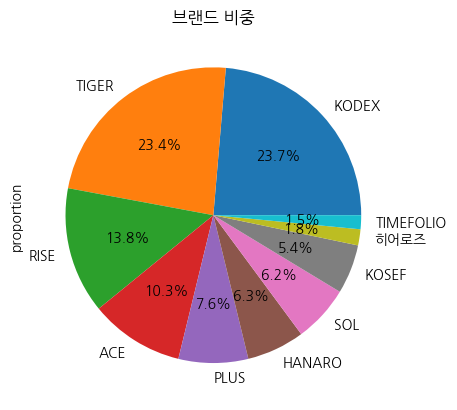

In [24]:
# 상위 10개 pie 그래프
df_etfs['Brand'].value_counts(normalize=True).sort_values(ascending=False).head(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('브랜드 비중')

단기적인 시장전망에 따라 투자하세요.

레버리지/인버스에 대해 처음 가장 많이 오해하기 쉬운 것이 장기적으로 투자를 할 경우에도 2배,-1배의 수익률을 얻을 것이라고 기대하는 것입니다. 하지만 이것은 잘못된 생각입니다. 그 이유는 레버리지/인버스 의 운용 목적은 "투자 기간" 동안의 기초지수의 움직임의 2배/-1배가 아닌, 기초지수의 "일간변동률"의 2배 / -1배를 추적하기 때문입니다.

당일 수익률이 반영되면 원금이 변하기 때문에 다음 날 수익률이 반영이 되더라도 원금이 달라진 상태에서 반영이 되므로 누적 수익률은 예상과 다른 결과가 나오게 됩니다.

따라서 레버리지/인버스 투자의 경우 단기적인 시장전망에 따라 매매하는 것이 바람직한 투자전략이 될 수 있습니다.
( 시장의 투자기간이 길수록 누적수익률과 기초지수의 누적수익률의 격차가 발생할 가능성이 높습니다. ) 

In [25]:
# 인버스 상품 가져오기
df_etfs[df_etfs['Name'].str.contains('인버스')].head(3)

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,Brand
27,252670,3,국내파생,KODEX 200선물인버스2X,2580,5,-30,-1.15,"2,579.00",15.74,29606878,76115,12748,KODEX
68,114800,3,국내파생,KODEX 인버스,4795,5,-30,-0.62,"4,792.00",8.55,3585976,17149,5313,KODEX
116,251340,3,국내파생,KODEX 코스닥150선물인버스,4270,5,-10,-0.23,"4,286.00",13.68,6431485,27286,2686,KODEX


In [26]:
# 주가가 떨어질 경우 오히려 수익을 얻는 펀드를 인버스 펀드나 리버스 펀드라고 합니다.
# 인버스상품과, 아닌것의 비율 구하기
df_etfs['인버스'] = df_etfs['Name'].str.contains('인버스')
df_etfs['인버스'].value_counts(normalize=True)*100

C:\Users\hydrl\AppData\Local\Temp\ipykernel_11464\4208132056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etfs['인버스'] = df_etfs['Name'].str.contains('인버스')


인버스
False   95.27
True     4.73
Name: proportion, dtype: float64

In [27]:
# 레버리지 ETF 선물 등 파생상품에 투자해 지수보다 높은 수익을 추구하는 ETF
# 레버리지 상품과 아닌 상품의 비율 구하기
df_etfs['레버리지'] = df_etfs['Name'].str.contains('레버리지')
df_etfs['레버리지'].value_counts(normalize=True)*100

C:\Users\hydrl\AppData\Local\Temp\ipykernel_11464\1008459407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etfs['레버리지'] = df_etfs['Name'].str.contains('레버리지')


레버리지
False   94.95
True     5.05
Name: proportion, dtype: float64

In [28]:
# 헤지 상품과 아닌 상품의 비율 구하기
df_etfs['헤지'] = df_etfs['Name'].str.endswith('(H)')
df_etfs['헤지'].value_counts(normalize=True)*100

C:\Users\hydrl\AppData\Local\Temp\ipykernel_11464\3158906002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_etfs['헤지'] = df_etfs['Name'].str.endswith('(H)')


헤지
False   93.33
True     6.67
Name: proportion, dtype: float64

In [29]:
df_etfs.head()

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,Brand,인버스,레버리지,헤지
0,459580,6,채권,KODEX CD금리액티브(합성),1057825,2,175,0.02,"1,057,729.00",0.84,58904,62309,94621,KODEX,False,False,False
1,357870,6,채권,TIGER CD금리투자KIS(합성),55435,3,0,0.00,"55,439.00",0.85,34705,1923,67034,TIGER,False,False,False
2,360750,4,해외주식,TIGER 미국S&P500,21435,2,280,1.32,"21,377.00",12.14,761654,16329,65495,TIGER,False,False,False
3,069500,1,국내 시장지수,KODEX 200,32045,2,180,0.56,"32,091.00",-7.36,994559,31958,54925,KODEX,False,False,False
4,133690,4,해외주식,TIGER 미국나스닥100,137515,2,1785,1.32,"137,154.00",15.83,89061,12260,43936,TIGER,False,False,False


In [30]:
df_etfs[df_etfs['레버리지']]

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,Brand,인버스,레버리지,헤지
13,122630,3,국내파생,KODEX 레버리지,13940,2,165,1.20,"14,016.00",-16.08,4349054,60822,21565,KODEX,False,True,False
24,233740,3,국내파생,KODEX 코스닥150레버리지,6370,2,25,0.39,"6,375.00",-26.52,10021525,64589,15632,KODEX,False,True,False
137,423920,4,해외주식,TIGER 미국필라델피아반도체레버리지(합성),24290,2,890,3.80,"24,220.00",7.19,43624,1062,2186,TIGER,False,True,False
155,409820,4,해외주식,KODEX 미국나스닥100레버리지(합성 H),12490,2,405,3.35,"12,431.00",10.21,82468,1032,1861,KODEX,False,True,False
162,462330,2,국내 업종/테마,KODEX 2차전지산업레버리지,1231,5,-59,-4.57,"1,239.00",-47.35,3275044,4149,1711,KODEX,False,True,False
222,418660,4,해외주식,TIGER 미국나스닥100레버리지(합성),26660,2,670,2.58,"26,522.00",33.32,23519,628,1146,TIGER,False,True,False
248,204480,4,해외주식,TIGER 차이나CSI300레버리지(합성),19400,2,15,0.08,"19,616.00",66.18,568,10,1001,TIGER,False,True,False
262,465610,4,해외주식,ACE 미국빅테크TOP7 Plus레버리지(합성),30790,2,995,3.34,"30,341.00",50.63,27435,845,954,ACE,False,True,False
284,452250,6,채권,ACE 미국30년국채선물레버리지(합성 H),5735,2,5,0.09,"5,735.00",-22.15,89094,511,797,ACE,False,True,False
293,267770,3,국내파생,TIGER 200선물레버리지,10620,2,120,1.14,"10,623.00",-16.57,36147,386,722,TIGER,False,True,False


In [31]:
new_file_name = f'new_etf_{today}.csv'
new_file_name

'new_etf_2024-12-23.csv'

In [32]:
df_etfs.to_csv(new_file_name, index=False)